## 1.用API爬取**證券交易所**
- [TWSE OpenAPI](https://openapi.twse.com.tw/#/%E8%AD%89%E5%88%B8%E4%BA%A4%E6%98%93/get_exchangeReport_STOCK_FIRST)

- 'https://openapi.twse.com.tw/v1/exchangeReport/STOCK_FIRST'

In [2]:
# %pip install beautifulsoup4
# %pip install requests

In [3]:
import requests

In [4]:
API = 'https://openapi.twse.com.tw/v1//exchangeReport/STOCK_DAY_ALL'    # 台灣證券交易所 - 個股日成交資訊
response = requests.get(API)
if response.status_code == 200:
    print('[Get data successfully]')
else:
    print('[Fail to get data]')
    
data = response.json()
print(f'共有 {len(data)} 筆資料')


[Get data successfully]
共有 1255 筆資料


In [5]:
print(data[0])

{'Code': '0050', 'Name': '元大台灣50', 'TradeVolume': '10476465', 'TradeValue': '1921213429', 'OpeningPrice': '183.20', 'HighestPrice': '185.00', 'LowestPrice': '182.10', 'ClosingPrice': '185.00', 'Change': '1.7500', 'Transaction': '12024'}


重視的資訊:
- OpeningPrice
- HighestPrice
- LowestPrice
- ClosingPrice

In [6]:
# Transform data to pandas dataframe
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
list = []
for d in data:
    list.append(d.values())
df = pd.DataFrame(list, columns=data[0].keys())

In [8]:
df

,Code,Name,TradeVolume,TradeValue,OpeningPrice,HighestPrice,LowestPrice,ClosingPrice,Change,Transaction
0,0050,元大台灣50,10476465,1921213429,183.20,185.00,182.10,185.00,1.7500,12024
1,0051,元大中型100,77800,6275632,80.70,80.85,80.45,80.80,0.1000,275
2,0052,富邦科技,443124,79247009,178.60,180.30,177.40,180.30,1.7000,1056
3,0053,元大電子,18673,1839678,98.45,99.05,97.90,99.05,1.1500,124
4,0055,元大MSCI金融,143906,4208275,29.22,29.30,29.18,29.30,0.0700,287
...,...,...,...,...,...,...,...,...,...,...
1250,9944,新麗,85123,1723015,20.25,20.30,20.15,20.20,0.0000,155
1251,9945,潤泰新,5074384,239223643,47.05,47.45,46.70,47.35,0.4000,3318
1252,9946,三發地產,1462465,42127501,28.60,29.40,28.45,28.60,-0.1000,1125
1253,9955,佳龍,4080369,152962647,37.15,38.10,36.60,37.80,1.0000,2775


In [27]:
from pylab import mpl

# 繁體中文
# mpl.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
mpl.rcParams['font.sans-serif'] = mpl.rcParamsDefault['font.sans-serif']    # reset to default

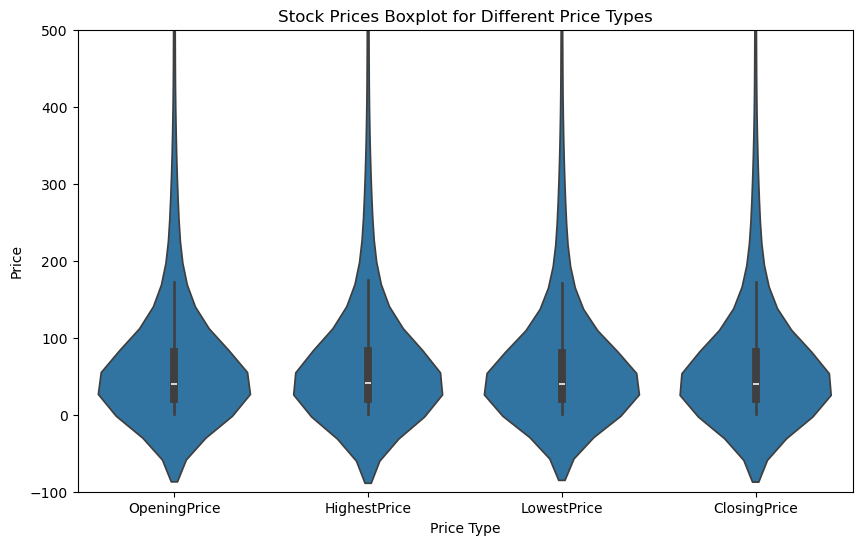

In [60]:
# 轉換數據格式，使得可以進行箱型圖的繪製
df_melted = df.melt(value_vars=['OpeningPrice', 'HighestPrice', 'LowestPrice', 'ClosingPrice'], 
                    var_name='PriceType', value_name='Price')
# 確保 Price 列轉換為浮點數
df_melted['Price'] = pd.to_numeric(df_melted['Price'], errors='coerce')

plt.figure(figsize=(10, 6))
# 繪製小提琴圖
sns.violinplot(x='PriceType', y='Price', data=df_melted)

# 設置標題和軸標籤
plt.title('Stock Prices Boxplot for Different Price Types')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.ylim(-100, 500)

# 顯示圖表
plt.show()

## 2. 手動爬取Yahoo!股市

https://tw.stock.yahoo.com/